In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('dark_background')

In [2]:
df = pd.read_csv('data/AirPassengers.csv')
print(df.dtypes)

Month          object
#Passengers     int64
dtype: object


In [3]:
df["Month"] = pd.to_datetime(df["Month"])
df.set_index("Month",inplace = True)

In [4]:
df.rename(columns = {'Month':'Date','#Passengers':'Passengers'},inplace=True)

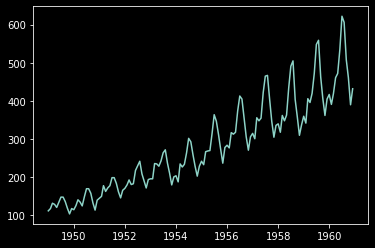

In [5]:
plt.plot(df['Passengers'])

In [6]:
from statsmodels.tsa.stattools import adfuller
adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(df)
if pvalue > 0.05:
    print('the data is not stationary')
else:
    print('the data is stationary')


the data is not stationary


In [7]:
df['year'] = [d.year for d in df.index]
df['month'] = [d.strftime('%b') for d in df.index]
years = df['year'].unique()

<AxesSubplot:xlabel='year', ylabel='Passengers'>

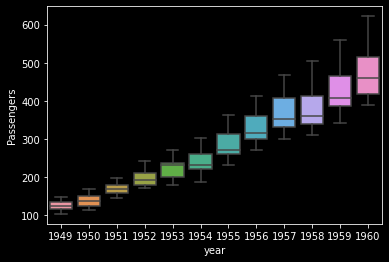

In [8]:
sns.boxplot(x='year', y='Passengers', data=df)
    

<AxesSubplot:xlabel='month', ylabel='Passengers'>

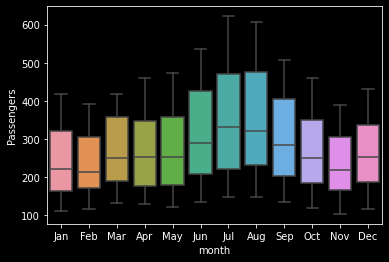

In [9]:
sns.boxplot(x='month', y='Passengers', data=df)

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose 
decomposed = seasonal_decompose(df['Passengers'],  
                            model ='additive')

In [11]:
trend = decomposed.trend
seasonal = decomposed.seasonal #Cyclic behavior may not be seasonal!
residual = decomposed.resid

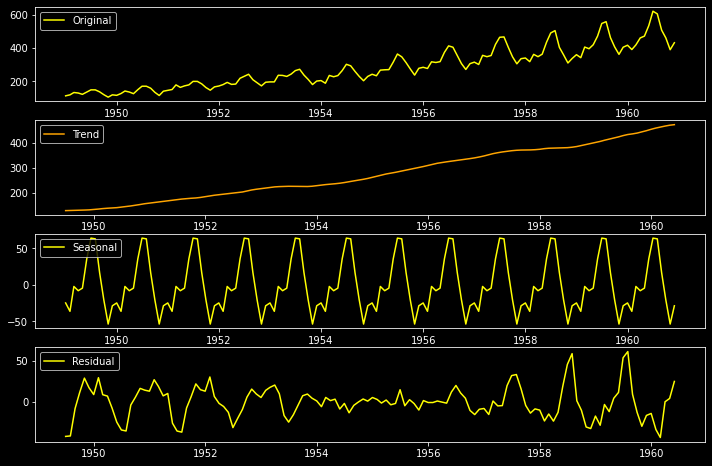

In [12]:
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df['Passengers'], label='Original', color='yellow')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color='orange')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='yellow')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual', color='yellow')
plt.legend(loc='upper left')
plt.show()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

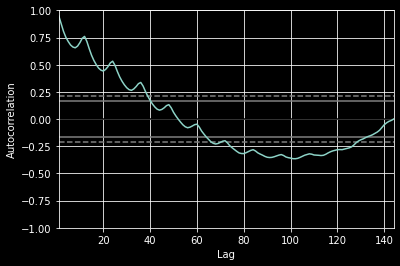

In [13]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df.Passengers) 

In [14]:
!pip install pmdarima

You should consider upgrading via the '/home/karthiksunil/anaconda3/envs/neuralnet/bin/python -m pip install --upgrade pip' command.


In [15]:
from pmdarima.arima import auto_arima
#Autoarima gives us bet model suited for the data
# p - number of autoregressive terms (AR)
# q - Number of moving avergae terms (MA)
# d - number of non-seasonal differences
#p, d, q represent non-seasonal components
#P, D, Q represent seasonal components
arima_model = auto_arima(df['Passengers'], start_p = 1, d=1, start_q = 1, 
                          max_p = 5, max_q = 5, max_d=5, m = 12, 
                          start_P = 0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5,
                          seasonal = True, 
                          trace = True, 
                          error_action ='ignore',   
                          suppress_warnings = True,  
                          stepwise = True, n_fits=50)           
  

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1022.393, Time=0.51 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.35 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.33 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.36 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=1020.582, Time=0.83 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.14 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.60 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=7.03 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.33 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.60 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=1.13 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.87 sec
 ARIMA(0,1,1)(1,1,0)[12]     

In [16]:
# To print the summary 
print(arima_model.summary() ) #Note down the Model and details.
# Model: SARIMAX(0, 1, 1)x(2, 1, [], 12)

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Tue, 18 May 2021   AIC                           1019.178
Time:                                     16:00:27   BIC                           1030.679
Sample:                                          0   HQIC                          1023.851
                                             - 144                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      

In [17]:
size = int(len(df) * 2/3)
X_train, X_test = df[0:size], df[size:len(df)]


In [18]:
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model = SARIMAX(X_train['Passengers'],  
                order = (0, 1, 1),  
                seasonal_order =(2, 1, 1, 12)) 
  


/home/karthiksunil/anaconda3/envs/neuralnet/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/karthiksunil/anaconda3/envs/neuralnet/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [19]:
result = model.fit() 
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                   96
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -303.555
Date:                            Tue, 18 May 2021   AIC                            617.109
Time:                                    16:00:31   BIC                            629.204
Sample:                                01-01-1949   HQIC                           621.968
                                     - 12-01-1956                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3110      0.101     -3.068      0.002      -0.510      -0.112
ar.S.L12       0.6788      0.621      1.093      0.274      -0.539       1.896
ar.S.L24       0.3202      0.140      2.279      0.023       0.045       0.596
ma.S.L12      -0.9824      6.023     -0.163      0.870     -12.787      10.822
sigma2        77.9960    421.787      0.185      0.853    -748.692     904.684
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.74
Prob(Q):                              0.98   Prob(JB):                         0.25
Heteroskedasticity (H):               1.70   Skew:                             0.44
Prob(H) (two-sided):                  0.17   Kurtosis:                         2.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
start_index = 0
end_index = len(X_train)-1
train_prediction = result.predict(start_index, end_index) 

In [21]:
start_index = len(X_train)
end_index = len(df)-1
prediction = result.predict(start_index, end_index).rename('Predicted passengers') 

<AxesSubplot:xlabel='Month'>

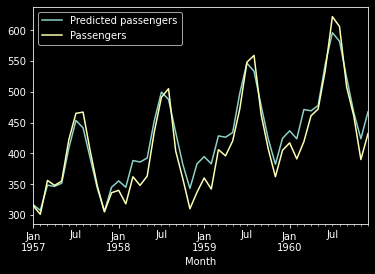

In [22]:
prediction.plot(legend = True) 
X_test['Passengers'].plot(legend = True) 

In [28]:
import math
from sklearn.metrics import mean_squared_error
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(X_train['Passengers'], train_prediction))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(X_test['Passengers'], prediction))
print('Test Score: %.2f RMSE' % (testScore))


Train Score: 16.07 RMSE
Test Score: 23.26 RMSE


In [31]:
forecast = result.predict(start = len(df),  
                          end = (len(df)-1) + 3 * 12,  
                          typ = 'levels').rename('Forecast') 
  

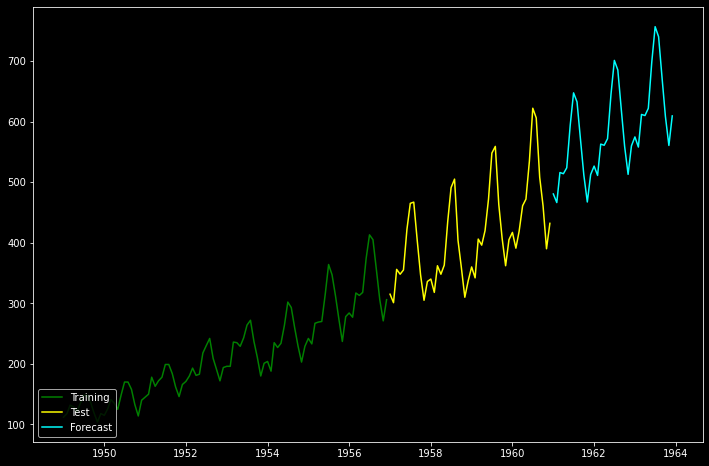

In [39]:
plt.figure(figsize=(12,8))
plt.plot(X_train['Passengers'], label='Training', color='green')
plt.plot(X_test['Passengers'], label='Test', color='yellow')
plt.plot(forecast, label='Forecast', color='cyan')
plt.legend(loc='lower left')
plt.show()


In [38]:
model = SARIMAX(df['Passengers'],  
                order = (0, 1, 1),  
                seasonal_order =(2, 1, 1, 12)) 
result = model.fit() 
result.summary() 

/home/karthiksunil/anaconda3/envs/neuralnet/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/karthiksunil/anaconda3/envs/neuralnet/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -501.959
Date:                            Tue, 18 May 2021   AIC                           1013.917
Time:                                    16:13:06   BIC                           1028.293
Sample:                                01-01-1949   HQIC                          1019.759
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4239      0.068     -6.197      0.000      -0.558      -0.290
ar.S.L12       0.6682      0.154      4.337      0.000       0.366       0.970
ar.S.L24       0.3305      0.096      3.450      0.001       0.143       0.518
ma.S.L12      -0.9759      1.285     -0.760      0.447      -3.494       1.542
sigma2       110.5372    119.976      0.921      0.357    -124.611     345.686
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 7.61
Prob(Q):                              0.91   Prob(JB):                         0.02
Heteroskedasticity (H):               2.80   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
forecast = result.predict(start = len(df),  
                          end = (len(df)-1) + 10 * 12,  
                          typ = 'levels').rename('Forecast') 

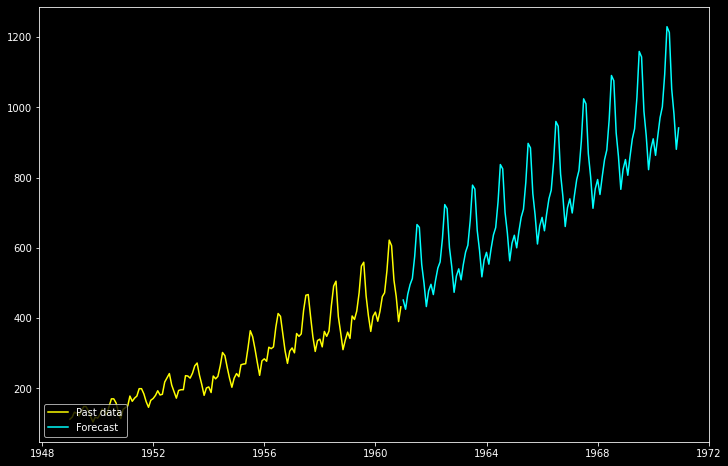

In [48]:
plt.figure(figsize=(12,8))
plt.plot(df['Passengers'], label='Past data', color='yellow')
plt.plot(forecast, label='Forecast', color='cyan')
plt.legend(loc='lower left')
plt.show()